<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/100DL/Gradient_descent_and_vansishing_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch


In [2]:
!kaggle datasets download -d akram24/social-network-ads

Dataset URL: https://www.kaggle.com/datasets/akram24/social-network-ads
License(s): CC0-1.0
  0% 0.00/3.27k [00:00<?, ?B/s]
100% 3.27k/3.27k [00:00<00:00, 6.21MB/s]


In [3]:
import zipfile
import os

dataset_name = "social-network-ads.zip"  # Change this to your dataset name

# Extract the dataset
with zipfile.ZipFile(dataset_name, 'r') as zip_ref:
    zip_ref.extractall("/content/")  # Extract to Colab
    print("Dataset extracted successfully!")


Dataset extracted successfully!


In [4]:
import pandas as pd
import numpy as np
import time

In [5]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df = df[['Age','EstimatedSalary','Purchased']]


In [7]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [10]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [21]:
y = np.array(y)

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=2)

In [24]:
X_train.shape

(320, 2)

In [25]:
y_train

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)

In [27]:
from torch import nn

In [73]:
class Mymodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=2,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=1),
        nn.Sigmoid()
    )

  def forward(self,x):
    return self.layer_stack(x)

In [144]:
modelv1 = Mymodel()

In [54]:
y_logits = modelv1(X_test)
y_logits.squeeze()

tensor([0.4596, 0.4325, 0.4491, 0.4533, 0.4387, 0.4367, 0.4553, 0.4418, 0.4502,
        0.4727, 0.4365, 0.4349, 0.4717, 0.4543, 0.4497, 0.4468, 0.4443, 0.4171,
        0.4411, 0.4410, 0.4574, 0.4434, 0.4473, 0.4445, 0.4549, 0.4412, 0.4389,
        0.4495, 0.4708, 0.4696, 0.4402, 0.4482, 0.4384, 0.4503, 0.4756, 0.4685,
        0.4472, 0.4419, 0.4442, 0.4627, 0.4461, 0.4511, 0.4625, 0.4591, 0.4429,
        0.4403, 0.4574, 0.4384, 0.4649, 0.4377, 0.4692, 0.4730, 0.4535, 0.4578,
        0.4719, 0.4425, 0.4431, 0.4683, 0.4707, 0.4537, 0.4586, 0.4523, 0.4470,
        0.4536, 0.4629, 0.4747, 0.4398, 0.4491, 0.4497, 0.4180, 0.4505, 0.4487,
        0.4482, 0.4442, 0.4559, 0.4533, 0.4486, 0.4412, 0.4557, 0.4535],
       grad_fn=<SqueezeBackward0>)

In [55]:
from torch import optim

In [145]:
optimizer = torch.optim.SGD(params = modelv1.parameters(),
                           lr=0.1)
loss_fnc = nn.BCELoss()

In [57]:
X_train.shape

torch.Size([320, 2])

In [58]:
from torch.utils.data import DataLoader, TensorDataset

In [60]:
import time

In [102]:
start = time.time()
batch_size = 320
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test,y_test)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

test_loss = []
epochs = 500

for i in range(epochs):
  train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
  for batch_idx, (X_batch,y_batch) in enumerate(train_dataloader):
    modelv1.train()

    y_logits = modelv1(X_batch)
    y_pred = y_logits.squeeze()

    loss = loss_fnc(y_pred,y_batch)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    if batch_idx % 5 == 0:
            print(f"Epoch {i+1}, Batch {batch_idx+1}, TRAIN Loss: {loss.item():.4f}")
  modelv1.eval()
  total_test_loss = 0
  with torch.inference_mode():
    for X_batch,y_batch in test_dataloader:

      y_logits = modelv1(X_batch)
      y_pred = y_logits.squeeze()

      loss = loss_fnc(y_pred,y_batch)

      total_test_loss += loss.item()


  avg_test_loss = total_test_loss/len(test_dataloader)
  test_loss.append(avg_test_loss)
  print(f"Epoch {i+1},TEST Loss: {avg_test_loss:.4f}")

print(time.time()-start)


# here we passed batch_size as 320
# that is the entire size of X_train
# so this is batch gradient descent
# notice its time
# it took 4 seconds


Epoch 1, Batch 1, TRAIN Loss: 0.7527
Epoch 1,TEST Loss: 0.7434
Epoch 2, Batch 1, TRAIN Loss: 0.7464
Epoch 2,TEST Loss: 0.7387
Epoch 3, Batch 1, TRAIN Loss: 0.7405
Epoch 3,TEST Loss: 0.7344
Epoch 4, Batch 1, TRAIN Loss: 0.7350
Epoch 4,TEST Loss: 0.7304
Epoch 5, Batch 1, TRAIN Loss: 0.7298
Epoch 5,TEST Loss: 0.7265
Epoch 6, Batch 1, TRAIN Loss: 0.7248
Epoch 6,TEST Loss: 0.7228
Epoch 7, Batch 1, TRAIN Loss: 0.7201
Epoch 7,TEST Loss: 0.7193
Epoch 8, Batch 1, TRAIN Loss: 0.7155
Epoch 8,TEST Loss: 0.7159
Epoch 9, Batch 1, TRAIN Loss: 0.7112
Epoch 9,TEST Loss: 0.7127
Epoch 10, Batch 1, TRAIN Loss: 0.7071
Epoch 10,TEST Loss: 0.7097
Epoch 11, Batch 1, TRAIN Loss: 0.7033
Epoch 11,TEST Loss: 0.7070
Epoch 12, Batch 1, TRAIN Loss: 0.6997
Epoch 12,TEST Loss: 0.7045
Epoch 13, Batch 1, TRAIN Loss: 0.6964
Epoch 13,TEST Loss: 0.7021
Epoch 14, Batch 1, TRAIN Loss: 0.6933
Epoch 14,TEST Loss: 0.6999
Epoch 15, Batch 1, TRAIN Loss: 0.6904
Epoch 15,TEST Loss: 0.6978
Epoch 16, Batch 1, TRAIN Loss: 0.6877
Epoch

In [93]:
import matplotlib.pyplot as plt

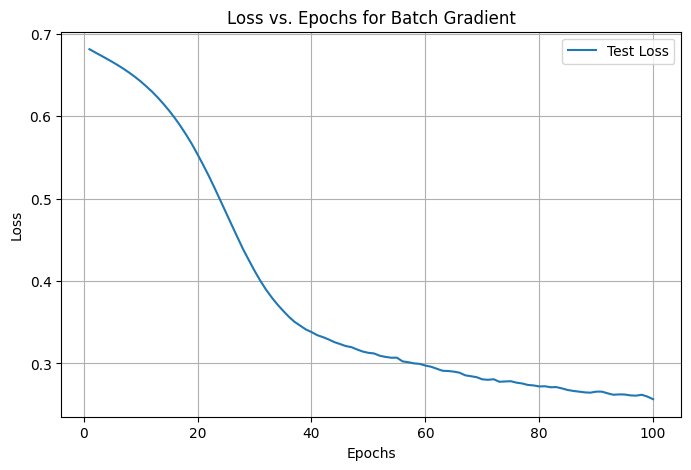

In [132]:
# Plot Training & Test Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), test_loss, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs for Batch Gradient")
plt.legend()
plt.grid()
plt.show()


In [152]:
modelv1 = Mymodel()

In [153]:
optimizer = torch.optim.SGD(modelv1.parameters(), lr=0.01)  # More adaptive


In [154]:
start = time.time()
batch_size = 1
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle = False)

test_loss = []
epochs = 500

for i in range(epochs):
  train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
  for batch_idx, (X_batch,y_batch) in enumerate(train_dataloader):
    modelv1.train()

    y_logits = modelv1(X_batch)
    y_pred = y_logits.flatten()

    loss = loss_fnc(y_pred,y_batch)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    if batch_idx % 5 == 0:
            print(f"Epoch {i+1}, Batch {batch_idx+1}, TRAIN Loss: {loss.item():.4f}")

  modelv1.eval()
  total_test_loss=0
  with torch.inference_mode():
    for X_batch,y_batch in test_dataloader:

      y_logits = modelv1(X_batch)
      y_pred = y_logits.flatten()

      loss = loss_fnc(y_pred,y_batch)
      total_test_loss += loss.item()

  avg_test_loss = total_test_loss/len(test_dataloader)

  test_loss.append(avg_test_loss)
  print(f"Epoch {i+1},TEST Loss: {avg_test_loss:.4f}")

print(time.time()-start)
# here we passes the batch size as 1
# so here we have actual bacthes , where each row or data point is a batch
# so it is stochastic gradient descent
# notice that it takes more time than batch gardient descent
# it took 188 seconds


Streaming output truncated to the last 5000 lines.
Epoch 424, Batch 31, TRAIN Loss: 0.0024
Epoch 424, Batch 36, TRAIN Loss: 0.0000
Epoch 424, Batch 41, TRAIN Loss: 0.1852
Epoch 424, Batch 46, TRAIN Loss: 0.0000
Epoch 424, Batch 51, TRAIN Loss: 1.9334
Epoch 424, Batch 56, TRAIN Loss: 0.1426
Epoch 424, Batch 61, TRAIN Loss: 0.1304
Epoch 424, Batch 66, TRAIN Loss: 0.1198
Epoch 424, Batch 71, TRAIN Loss: 0.0007
Epoch 424, Batch 76, TRAIN Loss: 0.0003
Epoch 424, Batch 81, TRAIN Loss: 0.0001
Epoch 424, Batch 86, TRAIN Loss: 0.1102
Epoch 424, Batch 91, TRAIN Loss: 0.0000
Epoch 424, Batch 96, TRAIN Loss: 0.2292
Epoch 424, Batch 101, TRAIN Loss: 0.0001
Epoch 424, Batch 106, TRAIN Loss: 0.0530
Epoch 424, Batch 111, TRAIN Loss: 0.0013
Epoch 424, Batch 116, TRAIN Loss: 0.0380
Epoch 424, Batch 121, TRAIN Loss: 0.1369
Epoch 424, Batch 126, TRAIN Loss: 0.0000
Epoch 424, Batch 131, TRAIN Loss: 0.0000
Epoch 424, Batch 136, TRAIN Loss: 0.0238
Epoch 424, Batch 141, TRAIN Loss: 0.0000
Epoch 424, Batch 146

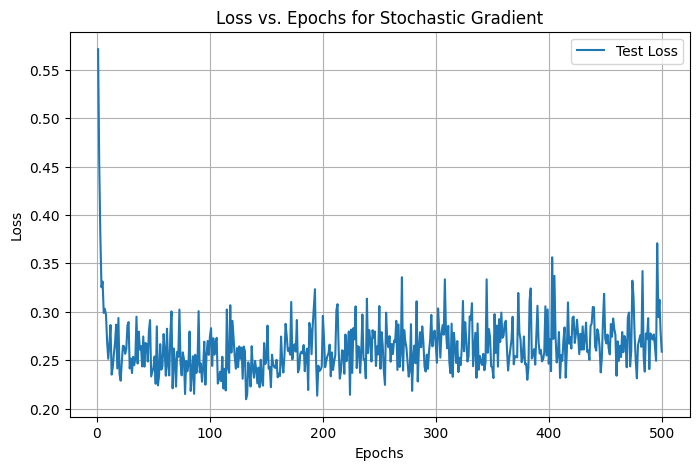

In [155]:
# Plot Training & Test Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), test_loss, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs for Stochastic Gradient")
plt.legend()
plt.grid()
plt.show()


In [160]:
modelv1 = Mymodel()

In [162]:
optimizer = torch.optim.SGD(modelv1.parameters(), lr=0.1)  # More adaptive


In [163]:
# mini batch gradient descent

start = time.time()
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle = False)

test_loss = []
epochs = 500

for i in range(epochs):
  train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
  for batch_idx, (X_batch,y_batch) in enumerate(train_dataloader):
    modelv1.train()

    y_logits = modelv1(X_batch)
    y_pred = y_logits.flatten()

    loss = loss_fnc(y_pred,y_batch)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    if batch_idx % 5 == 0:
            print(f"Epoch {i+1}, Batch {batch_idx+1}, TRAIN Loss: {loss.item():.4f}")

  modelv1.eval()
  total_test_loss=0
  with torch.inference_mode():
    for X_batch,y_batch in test_dataloader:

      y_logits = modelv1(X_batch)
      y_pred = y_logits.flatten()

      loss = loss_fnc(y_pred,y_batch)
      total_test_loss += loss.item()

  avg_test_loss = total_test_loss/len(test_dataloader)

  test_loss.append(avg_test_loss)
  print(f"Epoch {i+1},TEST Loss: {avg_test_loss:.4f}")

print(time.time()-start)
# here we passes the batch size as 32
# so it is mini batch gradient descent
# notice that it takes more time than batch gardient descent
# but less time than stochastic gradient decent
# it took 9 seconds


Epoch 1, Batch 1, TRAIN Loss: 0.6942
Epoch 1, Batch 6, TRAIN Loss: 0.6703
Epoch 1,TEST Loss: 0.6599
Epoch 2, Batch 1, TRAIN Loss: 0.6868
Epoch 2, Batch 6, TRAIN Loss: 0.6540
Epoch 2,TEST Loss: 0.6330
Epoch 3, Batch 1, TRAIN Loss: 0.6502
Epoch 3, Batch 6, TRAIN Loss: 0.6277
Epoch 3,TEST Loss: 0.6054
Epoch 4, Batch 1, TRAIN Loss: 0.5794
Epoch 4, Batch 6, TRAIN Loss: 0.5596
Epoch 4,TEST Loss: 0.5708
Epoch 5, Batch 1, TRAIN Loss: 0.5723
Epoch 5, Batch 6, TRAIN Loss: 0.5833
Epoch 5,TEST Loss: 0.5331
Epoch 6, Batch 1, TRAIN Loss: 0.5638
Epoch 6, Batch 6, TRAIN Loss: 0.4679
Epoch 6,TEST Loss: 0.4960
Epoch 7, Batch 1, TRAIN Loss: 0.5049
Epoch 7, Batch 6, TRAIN Loss: 0.5056
Epoch 7,TEST Loss: 0.4611
Epoch 8, Batch 1, TRAIN Loss: 0.4739
Epoch 8, Batch 6, TRAIN Loss: 0.4671
Epoch 8,TEST Loss: 0.4356
Epoch 9, Batch 1, TRAIN Loss: 0.4728
Epoch 9, Batch 6, TRAIN Loss: 0.4614
Epoch 9,TEST Loss: 0.4152
Epoch 10, Batch 1, TRAIN Loss: 0.4312
Epoch 10, Batch 6, TRAIN Loss: 0.4978
Epoch 10,TEST Loss: 0.39

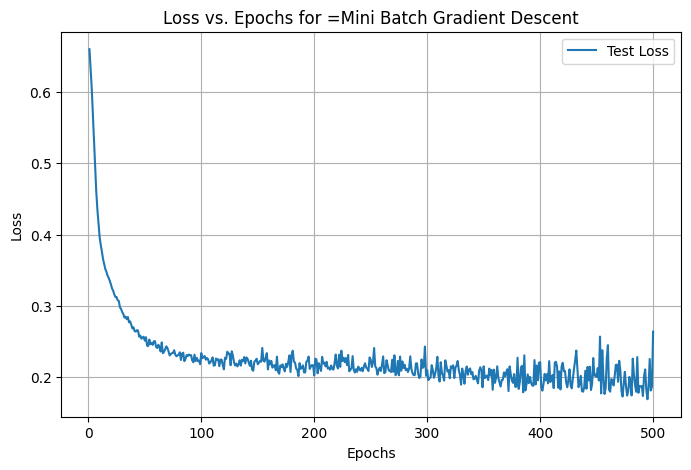

In [164]:
# Plot Training & Test Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), test_loss, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs for =Mini Batch Gradient Descent")
plt.legend()
plt.grid()
plt.show()


# Vanishing Gradient Problem

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons # binary categorical data
from sklearn.model_selection import train_test_split


In [174]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

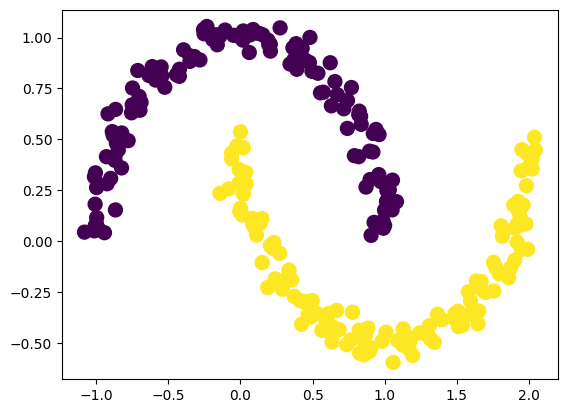

In [175]:
plt.scatter(X[:,0] , X[:,1],c=y,s=100)
plt.show()

In [176]:
import torch
from torch import nn


In [279]:
class moonsClassifierV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=2,out_features=10),
        nn.Sigmoid(),
        nn.Linear(in_features=10,out_features=10),
        nn.Sigmoid(),
        nn.Linear(in_features=10,out_features=10),
        nn.Sigmoid(),
        nn.Linear(in_features=10,out_features=10),
        nn.Sigmoid(),
        nn.Linear(in_features=10,out_features=10),
        nn.Sigmoid(),
        nn.Linear(in_features=10,out_features=10),
        nn.Sigmoid(),
        nn.Linear(in_features=10,out_features=10),
        nn.Sigmoid(),
        nn.Linear(in_features=10,out_features=10),
        nn.Sigmoid(),
        nn.Linear(in_features=10,out_features=10),
        nn.Sigmoid(),
        nn.Linear(in_features=10,out_features=1),
        nn.Sigmoid(),
    )

  def forward(self,x):
    return self.layer_stack(x)

In [280]:
mymodel1 = moonsClassifierV1()

In [193]:
y_logits = mymodel1(X_test)
y_logits.flatten()

tensor([0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274,
        0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274,
        0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274,
        0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274,
        0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274, 0.4274,
        0.4274, 0.4274, 0.4274, 0.4274, 0.4274], grad_fn=<ViewBackward0>)

In [190]:
y_test

tensor([1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
        1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [281]:
old_weights = mymodel1.layer_stack[0].weight
old_weights

Parameter containing:
tensor([[-0.3578,  0.2087],
        [ 0.5920, -0.3648],
        [ 0.1931, -0.6603],
        [-0.6316, -0.6763],
        [ 0.1447, -0.4944],
        [-0.5691, -0.2964],
        [ 0.3250, -0.2866],
        [ 0.0561,  0.4641],
        [ 0.6388, -0.1165],
        [ 0.1889,  0.5391]], requires_grad=True)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [283]:
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)


In [284]:
from torch.utils.data import DataLoader, TensorDataset

In [285]:
X_train.shape

torch.Size([200, 2])

In [286]:
loss_fnc = nn.BCELoss()
optimizer = torch.optim.Adam(params = mymodel1.parameters(),
                             lr = 0.01)

In [287]:
batch_size = 32

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test,y_test)

test_dataloader = DataLoader(train_dataset,batch_size=batch_size)
train_dataloader = DataLoader(test_dataset, batch_size = batch_size)

epochs = 60

test_loss = []
train_loss = []
for i in range(epochs):
  total_train_loss = 0
  for X_batch,y_batch in train_dataloader:

    mymodel1.train()

    y_logits = mymodel1(X_batch)
    y_pred = y_logits.flatten()

    loss = loss_fnc(y_pred,y_batch)
    total_train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
  avg_train_loss = total_train_loss/len(train_dataloader)
  print(f"epoch : {i} , train loss : {avg_train_loss}")

  mymodel1.eval()
  total_test_loss = 0
  with torch.inference_mode():
    for X_batch,y_batch in test_dataloader:

      y_logits = mymodel1(X_batch)
      y_pred = y_logits.flatten()

      loss = loss_fnc(y_pred, y_batch)

      total_test_loss += loss.item()

    avg_test_loss = total_test_loss/len(test_dataloader)
    test_loss.append(avg_test_loss)

    print(f"epoch : {i} , test loss {avg_test_loss}")






epoch : 0 , train loss : 0.707212507724762
epoch : 0 , test loss 0.6921629820551191
epoch : 1 , train loss : 0.694245457649231
epoch : 1 , test loss 0.6949186750820705
epoch : 2 , train loss : 0.6877451539039612
epoch : 2 , test loss 0.7010669537952968
epoch : 3 , train loss : 0.685873806476593
epoch : 3 , test loss 0.7081485986709595
epoch : 4 , train loss : 0.6866369843482971
epoch : 4 , test loss 0.7138931580952236
epoch : 5 , train loss : 0.6881320178508759
epoch : 5 , test loss 0.7170697365488324
epoch : 6 , train loss : 0.6891826689243317
epoch : 6 , test loss 0.7176132713045392
epoch : 7 , train loss : 0.689453125
epoch : 7 , test loss 0.7161551373345512
epoch : 8 , train loss : 0.6891238689422607
epoch : 8 , test loss 0.7135301147188459
epoch : 9 , train loss : 0.6885360479354858
epoch : 9 , test loss 0.7104859437261309
epoch : 10 , train loss : 0.687977135181427
epoch : 10 , test loss 0.7075645242418561
epoch : 11 , train loss : 0.6875998675823212
epoch : 11 , test loss 0.7050

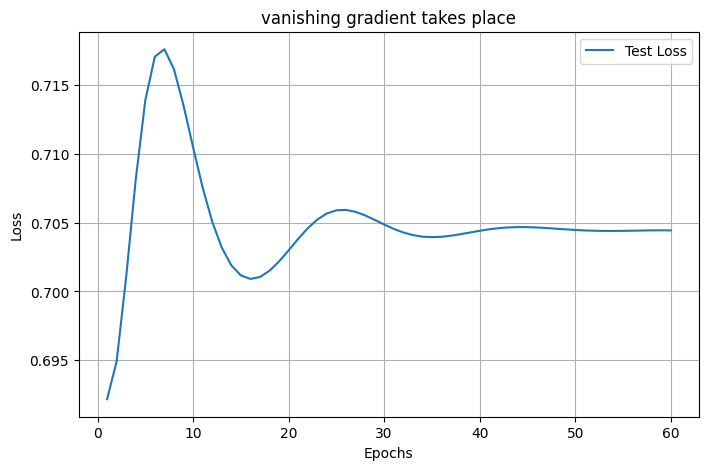

In [288]:
# Plot Training & Test Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), test_loss, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("vanishing gradient takes place")
plt.legend()
plt.grid()
plt.show()


In [264]:
new_weights = mymodel1.layer_stack[0].weight
new_weights

Parameter containing:
tensor([[ 0.9721, -2.4025],
        [-0.6574,  2.0762],
        [-0.6425,  2.0283],
        [ 0.7894, -2.2299],
        [ 0.7231, -1.9108],
        [-0.7994,  0.8544],
        [ 0.9768, -2.3844],
        [ 0.7172, -1.3401],
        [ 0.2695,  0.8532],
        [-1.1055,  2.5746]], requires_grad=True)

In [265]:
old_weights

Parameter containing:
tensor([[ 0.7440,  0.0223],
        [-0.0968,  0.2141],
        [ 0.4897,  0.1600],
        [-0.8019, -0.3792],
        [-0.1990, -0.4810],
        [-0.7261,  0.0223],
        [-0.1580, -0.7256],
        [ 0.3400, -0.3489],
        [-0.1576, -0.4804],
        [ 0.3995, -0.0881]], requires_grad=True)

In [267]:
percentage_change = abs(100*(old_weights-new_weights)/old_weights)
percentage_change

tensor([[3.0657e+01, 1.0851e+04],
        [5.7901e+02, 8.6951e+02],
        [2.3120e+02, 1.1675e+03],
        [1.9844e+02, 4.8805e+02],
        [4.6330e+02, 2.9723e+02],
        [1.0095e+01, 3.7251e+03],
        [7.1804e+02, 2.2861e+02],
        [1.1094e+02, 2.8407e+02],
        [2.7097e+02, 2.7760e+02],
        [3.7676e+02, 3.0228e+03]], grad_fn=<AbsBackward0>)

## reducing complexity of our model and relu activation

In [307]:
class moonsClassifierV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=2,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=1),
        nn.Sigmoid(),
    )

  def forward(self,x):
    return self.layer_stack(x)

In [308]:
mymodel2 = moonsClassifierV2()

In [309]:
old_weights = mymodel2.layer_stack[0].weight
old_weights

Parameter containing:
tensor([[ 0.3083,  0.0723],
        [-0.5065,  0.3958],
        [ 0.3435,  0.6248],
        [ 0.3254,  0.1328],
        [ 0.1826,  0.0775],
        [-0.3842,  0.4407],
        [ 0.5034,  0.1536],
        [ 0.2346, -0.3481],
        [ 0.5110,  0.6693],
        [-0.5798, -0.0970]], requires_grad=True)

In [310]:
loss_fnc = nn.BCELoss()
optimizer = torch.optim.Adam(params= mymodel2.parameters(),
                             lr=0.01)

In [311]:
batch_size = 32

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test,y_test)

test_dataloader = DataLoader(train_dataset,batch_size=batch_size)
train_dataloader = DataLoader(test_dataset, batch_size = batch_size)

epochs = 60

test_loss = []

for i in range(epochs):
  total_train_loss = 0
  for X_batch,y_batch in train_dataloader:

    mymodel2.train()

    y_logits = mymodel2(X_batch)
    y_pred = y_logits.flatten()

    loss = loss_fnc(y_pred,y_batch)
    total_train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
  avg_train_loss = total_train_loss/len(train_dataloader)
  print(f"epoch : {i} , train loss : {avg_train_loss}")

  mymodel2.eval()
  total_test_loss = 0
  with torch.inference_mode():
    for X_batch,y_batch in test_dataloader:

      y_logits = mymodel2(X_batch)
      y_pred = y_logits.flatten()

      loss = loss_fnc(y_pred, y_batch)

      total_test_loss += loss.item()

    avg_test_loss = total_test_loss/len(test_dataloader)
    test_loss.append(avg_test_loss)

    print(f"epoch : {i} , test loss {avg_test_loss}")






epoch : 0 , train loss : 0.6916811168193817
epoch : 0 , test loss 0.685073367186955
epoch : 1 , train loss : 0.6586681306362152
epoch : 1 , test loss 0.6618374586105347
epoch : 2 , train loss : 0.6268633008003235
epoch : 2 , test loss 0.6357489909444537
epoch : 3 , train loss : 0.5938622951507568
epoch : 3 , test loss 0.6089511598859515
epoch : 4 , train loss : 0.5623214244842529
epoch : 4 , test loss 0.5789883647646222
epoch : 5 , train loss : 0.5281158983707428
epoch : 5 , test loss 0.5490041673183441
epoch : 6 , train loss : 0.4947546124458313
epoch : 6 , test loss 0.5183960582528796
epoch : 7 , train loss : 0.4592277705669403
epoch : 7 , test loss 0.48644139085497173
epoch : 8 , train loss : 0.4211093783378601
epoch : 8 , test loss 0.454018486397607
epoch : 9 , train loss : 0.38246989250183105
epoch : 9 , test loss 0.42306728873934063
epoch : 10 , train loss : 0.34552666544914246
epoch : 10 , test loss 0.39486790129116606
epoch : 11 , train loss : 0.3122015669941902
epoch : 11 , te

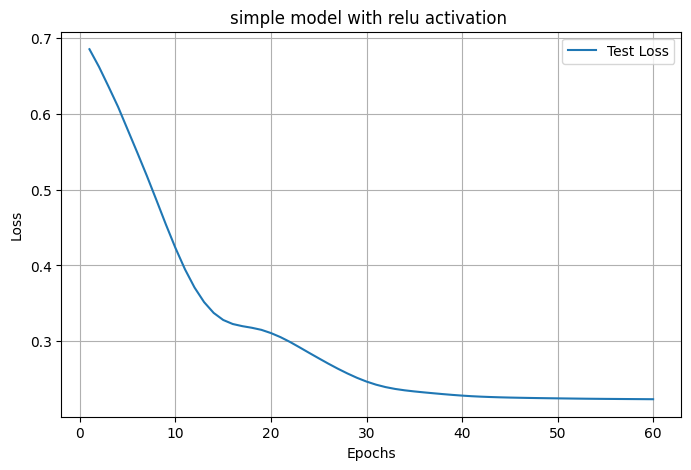

In [312]:
# Plot Training & Test Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), test_loss, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("simple model with relu activation ")
plt.legend()
plt.grid()
plt.show()


In [313]:
new_weights = mymodel2.layer_stack[0].weight
new_weights

Parameter containing:
tensor([[ 0.2527,  0.0167],
        [-0.1929,  0.8567],
        [ 0.1781,  1.1654],
        [ 0.4601, -0.2352],
        [ 0.2789,  0.6805],
        [-0.2018,  0.2523],
        [ 0.7051, -0.3076],
        [ 0.3768, -0.8922],
        [ 0.5219,  1.0268],
        [-1.3917,  0.0582]], requires_grad=True)

In [314]:
# you can see the change in the old and new weights

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], grad_fn=<AbsBackward0>)